# Current voltage curves

This example shows how the Thales I/E software package can be controlled with Python.

The [I/E manual](https://doc.zahner.de/manuals/ie.pdf) provides further explanation of this method and explains the settings.

In [1]:
import sys
from thales_remote.connection import ThalesRemoteConnection
from thales_remote.script_wrapper import ThalesRemoteScriptWrapper

from zahner_analysis.file_import.iss_import import IssImport

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# Establish and initialize 

The Term software must be started before the script is executed to be able to connect.

In [ ]:
if __name__ == "__main__":
    zenniumConnection = ThalesRemoteConnection()
    zenniumConnection.connectToTerm("localhost", "ScriptRemote")
        
    zahnerZennium = ThalesRemoteScriptWrapper(zenniumConnection)
    zahnerZennium.forceThalesIntoRemoteScript()

# I/E output file setup

The first step is to set where the measurement data is to be saved. The path must exist otherwise you will get an error.

In [3]:
    zahnerZennium.setIEOutputPath(r"C:\THALES\temp\ie")

'OK\r'

Then it is set that the measurements are named individual.  
In the further process, the other two naming types are also configured as examples.

In [4]:
    zahnerZennium.setIENaming("individual")

'OK\r'

# I/E measurement parameters

In the next step, the actual parameters for the measurement method are set.  
Alternatively, a rule file could be loaded which sets the parameters for the measurement.

The methods are named after the parameters they set. Additional information can be found in the [API documentation](https://doc.zahner.de/thales_remote/script_wrapper.html).

In [5]:
    zahnerZennium.calibrateOffsets()
    
    zahnerZennium.setIEFirstEdgePotential(0)
    zahnerZennium.setIEFirstEdgePotentialRelation("absolute")
    zahnerZennium.setIESecondEdgePotential(0.4)
    zahnerZennium.setIESecondEdgePotentialRelation("absolute")
    zahnerZennium.setIEThirdEdgePotential(-0.4)
    zahnerZennium.setIEThirdEdgePotentialRelation("absolute")
    zahnerZennium.setIEFourthEdgePotential(0)
    zahnerZennium.setIEFourthEdgePotentialRelation("absolute")
    
    zahnerZennium.setIEPotentialResolution(0.005)
    zahnerZennium.setIEMinimumWaitingTime(0.1)
    zahnerZennium.setIEMaximumWaitingTime(3)
    zahnerZennium.setIERelativeTolerance(0.01)  #1 %
    zahnerZennium.setIEAbsoluteTolerance(0.001) #1 mA
    zahnerZennium.setIEOhmicDrop(0)
    
    zahnerZennium.setIEScanRate(0.05)
    zahnerZennium.setIEMaximumCurrent(3)
    zahnerZennium.setIEMinimumCurrent(-3)

'OK\r'

# Execute the measurement

In the following, the three different types of I/E are executed one after the other.

It also adjusts the file name before each measurement and changes the naming of the files.

The [IE manual](https://doc.zahner.de/manuals/ie.pdf) explains the individual types.

## Steady State

In [6]:
    zahnerZennium.setIESweepMode("steady state")
    zahnerZennium.setIEOutputFileName("ie_steady")

'OK\r'

After checking whether the parameters have been set correctly, the measurement is started.

In [7]:
    zahnerZennium.checkIESetup()
    print(zahnerZennium.readIESetup())
    
    zahnerZennium.measureIE()

OK;IESETUP;IE_EckPot1=0.0000e+00;IE_EckPot2=4.0000e-01;IE_EckPot3=-4.0000e-01;IE_EckPot4=0.0000e+00;IE_EckPot1rel=0;IE_EckPot2rel=0;IE_EckPot3rel=0;IE_EckPot4rel=0;IE_Resolution=5.0000e-03;IE_WZmin=0.1;IE_WZmax=3;IE_Torel=1.0000e-02;IE_Toabs=1.0000e-03;IE_Odrop=0.0000e+00;IE_SweepMode=0;IE_Srate=5.0000e-02;IE_Imi=-3.0000e+00;IE_Ima=3.0000e+00;ENDSETUP


'IE DONE\r'

## Dynamic Scan

The names of the measurement results are extended with date and time.

In [8]:
    zahnerZennium.setIESweepMode("dynamic scan")
    zahnerZennium.setIEOutputFileName("ie_dynamic")
    
    zahnerZennium.checkIESetup()
    print(zahnerZennium.readIESetup())
    
    zahnerZennium.measureIE()

OK;IESETUP;IE_EckPot1=0.0000e+00;IE_EckPot2=4.0000e-01;IE_EckPot3=-4.0000e-01;IE_EckPot4=0.0000e+00;IE_EckPot1rel=0;IE_EckPot2rel=0;IE_EckPot3rel=0;IE_EckPot4rel=0;IE_Resolution=5.0000e-03;IE_WZmin=0.1;IE_WZmax=3;IE_Torel=1.0000e-02;IE_Toabs=1.0000e-03;IE_Odrop=0.0000e+00;IE_SweepMode=2;IE_Srate=5.0000e-02;IE_Imi=-3.0000e+00;IE_Ima=3.0000e+00;ENDSETUP


'IE DONE\r'

## Fixed Sampling

The names of the measurement results are extended with date and time.

In [9]:
    zahnerZennium.setIESweepMode("fixed sampling")
    zahnerZennium.setIEOutputFileName("ie_fixed")
    
    zahnerZennium.checkIESetup()
    print(zahnerZennium.readIESetup())
    
    zahnerZennium.measureIE()

OK;IESETUP;IE_EckPot1=0.0000e+00;IE_EckPot2=4.0000e-01;IE_EckPot3=-4.0000e-01;IE_EckPot4=0.0000e+00;IE_EckPot1rel=0;IE_EckPot2rel=0;IE_EckPot3rel=0;IE_EckPot4rel=0;IE_Resolution=5.0000e-03;IE_WZmin=0.1;IE_WZmax=3;IE_Torel=1.0000e-02;IE_Toabs=1.0000e-03;IE_Odrop=0.0000e+00;IE_SweepMode=1;IE_Srate=5.0000e-02;IE_Imi=-3.0000e+00;IE_Ima=3.0000e+00;ENDSETUP


'IE DONE\r'

# Disconnect

In [10]:
    zenniumConnection.disconnectFromTerm()

# Plotting an IE measurement

With the [zahner_analysis](https://pypi.org/project/zahner-analysis/) Python package, the I/E measurements can also be read in for further processing.

Here the measurement data are plotted as an example.

In this example the measurement data is loaded from a file, but it is also possible to process the data via the remote file interface directly after the measurement in Python. There is also an [example of this using impedance spectra](https://github.com/Zahner-elektrik/Thales-Remote-Python/blob/main/Examples/FileExchangeEIS/FileExchangeEIS.ipynb).

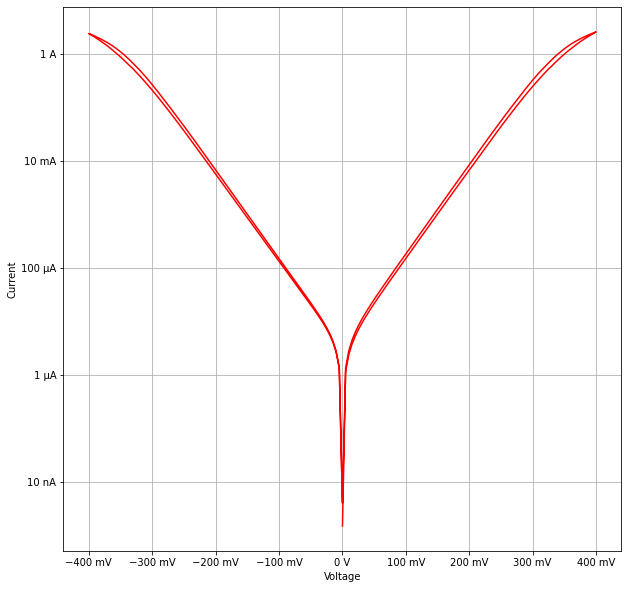

In [11]:
    measurementData = IssImport(r"C:\THALES\temp\ie\ie_steady.iss")


    fig, (axis) = plt.subplots(1, 1)
    axis.semilogy(measurementData.getVoltageArray(), abs(measurementData.getCurrentArray()), color = "red")
    
    axis.grid(which="both")
    axis.xaxis.set_major_formatter(EngFormatter(unit="V"))
    axis.yaxis.set_major_formatter(EngFormatter(unit="A"))
    axis.set_xlabel(r"Voltage")
    axis.set_ylabel(r"Current")
    fig.set_size_inches(10, 10)
    plt.show()

In [12]:
    print("finish")

finish
